In [32]:
import pandas as pd
import os
import plotly.express as px


In [14]:

def load_queries(QUERY):
    bot = Flipsider(os.getenv('API_KEY'))
    df = bot.run(QUERY)
    return df

from queries import *
from data_loading import Flipsider
from tqdm import tqdm

d = {}
for month in tqdm(range(1,8)):
    print(month)
    QUERY = return_query(month)
    d[month] = load_queries(QUERY)


  0%|                                                                                                                                                                                    | 0/7 [00:00<?, ?it/s]

1


 14%|████████████████████████▌                                                                                                                                                   | 1/7 [00:01<00:08,  1.44s/it]

2


 29%|█████████████████████████████████████████████████▏                                                                                                                          | 2/7 [00:02<00:06,  1.30s/it]

3


 43%|█████████████████████████████████████████████████████████████████████████▋                                                                                                  | 3/7 [00:03<00:05,  1.31s/it]

4


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 4/7 [00:05<00:03,  1.32s/it]

5


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 5/7 [00:06<00:02,  1.31s/it]

6


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 6/7 [00:07<00:01,  1.32s/it]

7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:09<00:00,  1.29s/it]


In [15]:
d.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

In [16]:
d[7]


,DATE,PROGRAM_ID,COUNTS
0,2022-07-03,cndy3Z4yapfJBmL3ShUp5exZKqR3z33thTzeNMm2gRZ,36128
1,2022-07-05,7vxeyaXGLqcp66fFShqUdHxdacp4k4kwUpRSSeoZLCZ4,8524
2,2022-07-04,MERLuDFBMmsHnsBPZw2sDQZHvXFMwp8EdjudcU2HKky,179
3,2022-07-01,BPFLoaderUpgradeab1e11111111111111111111111,54454
4,2022-07-02,SwaPpA9LAaLfeLi3a68M4DjnLqgtticKg6CnyNwgAC8,1176
...,...,...,...
255,2022-07-04,7vxeyaXGLqcp66fFShqUdHxdacp4k4kwUpRSSeoZLCZ4,29893
256,2022-07-02,jCebN34bUfdeUYJT13J1yG16XWQpt5PDx6Mse9GUqhR,154
257,2022-07-01,781wH11JGQgEoBkBzuc8uoQLtp8KxeHk1yZiS1JhFYKy,40
258,2022-07-03,BHJ4tRcogS88tUhYotPfYWDjR4q7MGdizdiguY3N54rb,16


In [18]:
data = pd.concat([d[month] for month in tqdm(range(1,7))],axis=0,ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30765.07it/s]


In [19]:
data.to_hdf('data_jan_jun.hdf',key='df')

In [63]:
df.head()

,DATE,PROGRAM_ID,COUNTS
0,2022-01-11,9xQeWvG816bUx9EPjHmaT23yvVM2ZWbrrpZb9PusVFin,8298909
1,2022-01-16,11111111111111111111111111111111,6598670
2,2022-01-28,11111111111111111111111111111111,9146828
3,2022-01-25,675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8,606973
4,2022-01-26,TokenkegQfeZyiNwAJbNbGKPFXCWuBvf9Ss623VQ5DA,1284277


In [107]:
def get_labels(df):
    labels = df['PROGRAM_ID'].unique()

    labels = [f"'{i}'" for i in labels]

    string = ",".join(labels)

    LABEL_QUERY = f"""
    select
    address,
    address_name,
    label,
    label_type,
    label_subtype
    from solana.core.dim_labels
    where address in ({string})
    """
    return LABEL_QUERY

labels = load_queries(get_labels(df))

In [109]:
labels

,ADDRESS,ADDRESS_NAME,LABEL,LABEL_TYPE,LABEL_SUBTYPE
0,HajXYaDXmohtq2ZxZ6QVNEpqNn1T53Zc9FnR1CnaNnUf,parrot finance,parrot defi,defi,general_contract
1,cndy3Z4yapfJBmL3ShUp5exZKqR3z33thTzeNMm2gRZ,metaplex nft candy machine v2,metaplex,nft,contract_deployer
2,cndyAnrLdpjq1Ssp1z8xxDsB8dxe7u4HL5Nxi2K5WXZ,metaplex nft candy machine v1,metaplex,nft,contract_deployer
3,EUqojwWA2rd19FZrzeBncJsm38Jm1hEhE3zsmX3bRc2o,serum dex v2,serum,dex,general_contract
4,jCebN34bUfdeUYJT13J1yG16XWQpt5PDx6Mse9GUqhR,bonfida name service,bonfida,dapp,general_contract
...,...,...,...,...,...
60,675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8,Raydium Liquidity Pool V4,raydium,dex,pool
61,7t8zVJtPCFAqog1DcnB6Ku1AVKtWfHkCiPi1cAvcJyVF,digitaleyes direct sell,digitaleyes,nft,marketplace
62,7vxeyaXGLqcp66fFShqUdHxdacp4k4kwUpRSSeoZLCZ4,SOLfarm Vault,solfarm,defi,pool
63,617jbWo616ggkDxvW1Le8pV38XLbVSyWY8ae6QUmGBAU,Solsea NFT Marketplace,solsea,nft,marketplace


In [117]:
def do_treemap(df,labels):
    plot_data = df.groupby('PROGRAM_ID')['COUNTS'].sum().to_frame().reset_index()
    plot_data = plot_data.merge(labels,left_on='PROGRAM_ID',right_on='ADDRESS',how='left')

    fig = px.treemap(plot_data, path=['LABEL_TYPE', 'LABEL_SUBTYPE', 'LABEL'], values='COUNTS')
    return fig

In [119]:
plot_data

,PROGRAM_ID,COUNTS,ADDRESS,ADDRESS_NAME,LABEL,LABEL_TYPE,LABEL_SUBTYPE
0,11111111111111111111111111111111,803271059,11111111111111111111111111111111,system program,solana,chadmin,general_contract
1,22Y43yTVxuUkoRKdm9thyRhQ3SdgQS7c7kB6UNCiaczD,367720,22Y43yTVxuUkoRKdm9thyRhQ3SdgQS7c7kB6UNCiaczD,serum swap,serum,dex,general_contract
2,27haf8L6oxUeXrHrgEgsexjSY5hbVUWEmvv9Nyxg8vQv,56,27haf8L6oxUeXrHrgEgsexjSY5hbVUWEmvv9Nyxg8vQv,raydium liquidity pool v3,raydium,dex,pool
3,4ckmDgGdxQoPDLUkDT3vHgSAkzA3QRdNq5ywwY4sUSJn,44,4ckmDgGdxQoPDLUkDT3vHgSAkzA3QRdNq5ywwY4sUSJn,serum dex v1,serum,dex,general_contract
4,5fNfvyp5czQVX77yoACa3JJVEhdRaWjPuazuWgjhTqEH,4070,5fNfvyp5czQVX77yoACa3JJVEhdRaWjPuazuWgjhTqEH,mango markets v2,mango markets,dex,general_contract
...,...,...,...,...,...,...,...
60,mv3ekLzLbnVPNxjSKvqBpU3ZeZXPQdEC3bp5MDEBG68,424635203,mv3ekLzLbnVPNxjSKvqBpU3ZeZXPQdEC3bp5MDEBG68,Mango Markets,mango markets,dex,general_contract
61,namesLPneVptA9Z5rqUDD9tMTWEJwofgaYwp8cawRkX,48536,namesLPneVptA9Z5rqUDD9tMTWEJwofgaYwp8cawRkX,name service program,solana,chadmin,general_contract
62,p1exdMJcjVao65QdewkaZRUnU6VPSXhus9n2GzWfh98,192542,p1exdMJcjVao65QdewkaZRUnU6VPSXhus9n2GzWfh98,metaplex program,metaplex,nft,general_contract
63,rinajRPUgiiW2rG6uieXvcNNQNaWr9ZcMmqo28VvXfa,339633,rinajRPUgiiW2rG6uieXvcNNQNaWr9ZcMmqo28VvXfa,aldrin staking,aldrin,dex,pool


In [20]:
df = pd.concat([data,d[7]],axis=0)

In [24]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [29]:
data = df.groupby('DATE')['COUNTS'].sum().to_frame('COUNTS').reset_index()

In [89]:
def get_ma(data, window=10):
    data2 = data.sort_values('DATE').rolling(window=window)['COUNTS'].mean().reset_index()
    data2['DATE'] = data.sort_values('DATE')['DATE']
    return data2

def plot_total_counts(data):
    fig = px.bar(data_frame=data,
        x='DATE',
        y='COUNTS', title='Total Transaction Counts'
        #color='VOTES'
                )
    
    for i in [10,20,50]:
        data2 = get_ma(data, window=i)
        fig.add_traces(go.Scatter(x= data2['DATE'].tolist(), y=data2['COUNTS'].tolist(), mode = 'lines', name=f'{i}-day MA'))

    return fig

def piechart(df, n=20):
    plot_data = df.groupby('PROGRAM_ID')['COUNTS'].sum().to_frame().reset_index()
    min_value = plot_data.sort_values('COUNTS',ascending=False).head(n)['COUNTS'].min()
    plot_data.loc[plot_data['COUNTS'] < min_value, 'PROGRAM_ID'] = 'Other Program IDs' # Represent only large countries
    fig = px.pie(plot_data, 
                 values='COUNTS', 
                 names='PROGRAM_ID', title=f'{n} Top Program IDs',
                )
    fig.update_traces(textposition='inside', textinfo='percent+value')
    return fig
def do_treemap(df,labels):
    plot_data = df.groupby('PROGRAM_ID')['COUNTS'].sum().to_frame().reset_index()
    plot_data = plot_data.merge(labels,left_on='PROGRAM_ID',right_on='ADDRESS',how='left')

    fig = px.treemap(plot_data, path=['LABEL_TYPE', 'LABEL_SUBTYPE', 'LABEL'], values='COUNTS')
    return fig

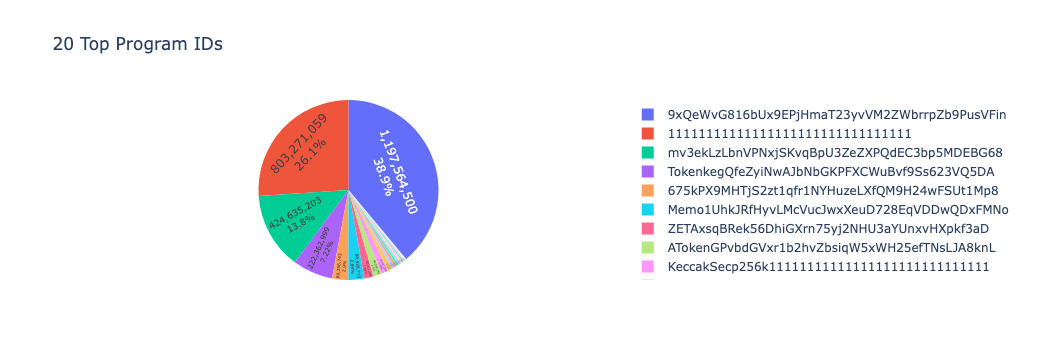

In [90]:
piechart(df, n=20)

In [98]:
labels = df['PROGRAM_ID'].unique()

labels = [f'"{i}"' for i in labels]

','.join(labels)

In [118]:
data.head()

,DATE,COUNTS
0,2022-01-01,22800147
1,2022-01-02,20251865
2,2022-01-03,17871639
3,2022-01-04,23351108
4,2022-01-05,19278988


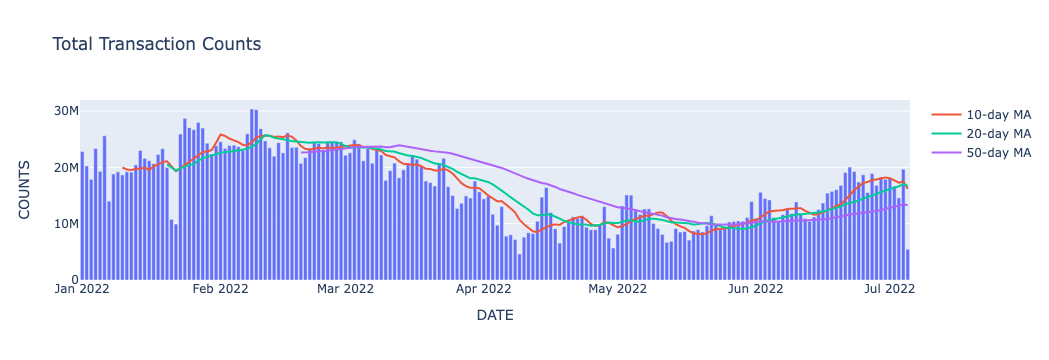

In [60]:
plot_total_counts(data)

In [ ]:
df

In [111]:
votes['BLOCK_TIMESTAMP'] = pd.to_datetime(votes['BLOCK_TIMESTAMP']) 
votes['PROPOSALID'] = votes['PROPOSALID'].astype('int')
votes['SUPPORT'] = votes['SUPPORT'].astype('int')
votes['VOTES'] = votes['VOTES'].astype('int')
traits['MINT_TIME'] = pd.to_datetime(traits['MINT_TIME'])
traits = traits.sort_values('MINT_TIME')

df = votes.groupby(['PROPOSALID','SUPPORT'])['VOTES'].sum().reset_index().sort_values('PROPOSALID')
turnout = votes.groupby('PROPOSALID')['VOTES'].sum()
proposal_start = votes.groupby('PROPOSALID')['BLOCK_TIMESTAMP'].max()
d = pd.Series({i: traits[traits['MINT_TIME']<j]['TOKENID'].count() for i,j in proposal_start.iteritems()},name='MINTED')
data = turnout.to_frame().join(d)
data['PROPORTION'] =  data['VOTES'] / data['MINTED']

In [155]:
votes['PROPOSALID'].max()


104

In [173]:
proposal=102

In [174]:
selected_proposal = votes.query('PROPOSALID==@proposal')

In [175]:
s = selected_proposal.groupby('SUPPORT')['VOTES'].sum()
s.loc[1] / s.sum() * 100

95.65217391304348

In [176]:
selected_proposal['VOTER'].nunique()

13

In [177]:
s = selected_proposal.groupby('SUPPORT')['VOTER'].count()
s.loc[1] / s.sum() * 100

92.3076923076923

In [180]:
data.loc[proposal,'MINTED']

365

In [184]:
votes.query('VOTER=="0xcc2688350d29623e2a0844cc8885f9050f0f6ed5"').sort_values('BLOCK_TIMESTAMP')

,BLOCK_TIMESTAMP,PROPOSALID,REASON,SUPPORT,VOTER,VOTES,EVENT
606,2022-03-05 18:30:15,41,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,2,1
734,2022-03-07 16:43:05,42,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,2,1
1478,2022-03-13 16:50:51,43,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,4,1
121,2022-03-22 00:08:56,44,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,5,1
518,2022-03-27 01:12:29,45,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,5,1
1544,2022-03-29 16:45:22,46,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,5,1
1233,2022-04-04 22:51:10,47,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,5,1
503,2022-04-04 22:57:28,48,,0,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,5,1
1524,2022-04-07 13:52:02,49,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,5,1
735,2022-04-11 23:26:08,51,,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,7,1


In [172]:
selected_proposal

,BLOCK_TIMESTAMP,PROPOSALID,REASON,SUPPORT,VOTER,VOTES,EVENT
71,2022-07-04 10:40:02,103,Easy yes for me. Attract builders to Nouns whi...,1,0xa86882277e69fbf0a51805cdc8b0a3a113079e63,4,1
163,2022-07-03 21:47:26,103,,1,0xa8d04cd4e1951291740ef977d56336fdc7f394c5,5,1
165,2022-07-04 13:44:10,103,,1,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,2,1
169,2022-07-04 13:54:49,103,Removing single points of failure is an import...,1,0x5d802e2fe48392c104ce0401c7eca8a4456f1f16,12,1
295,2022-07-04 23:44:57,103,,1,0xa555d1ee16780b2d414ed97f4f169c0740099615,2,1
638,2022-07-04 12:04:45,103,,1,0x33daf8e90cd1f214cc25a1865649e847254f2ece,1,1
639,2022-07-04 06:27:27,103,,1,0x9a2f6117d1ffa82ad0a2b36f133d476db5bd55f5,1,1
689,2022-07-04 17:47:17,103,,1,0xaca3b4110403f3c4dacb35a7b3aa0a84efb6a3e9,1,1
789,2022-07-05 04:38:30,103,⌐◨-◨,1,0xcc2688350d29623e2a0844cc8885f9050f0f6ed5,12,1
1027,2022-07-05 01:17:34,103,,1,0x91dccaa260cc4616e1a6e6b693db7207c5e42937,1,1


In [169]:
s

SUPPORT
1    10
Name: VOTER, dtype: int64

In [76]:
import plotly.express as px

In [ ]:
def get_votes(data,y='PROPORTION',color='VOTES'):
    fig = px.bar(data_frame=data.reset_index(),
        x='PROPOSALID',
        y=y,
        color=color)
    return fig

def get_minted(traits):
    traits.index = traits['MINT_TIME']
    d = traits.resample('d')['TOKENID'].count().cumsum().to_frame('NUMBER_OF_NOUNS_MINTED').reset_index()
    fig = px.bar(data_frame=d,
        x='MINT_TIME',
        y='NUMBER_OF_NOUNS_MINTED')
    return fig

def vote_vs_minted(df,data, col='MINTED'):
    # VOTES
    df['PROPOSALID'] = df['PROPOSALID'].astype('int')
    df['PROPORTION'] = df['VOTES'] / df['PROPOSALID'].map(data[col])
    df['PROPOSALID'] = df['PROPOSALID'].astype('str')

    fig = px.line_polar(df, r="PROPORTION", theta="PROPOSALID", color="SUPPORT",
                        width = 400,height=600
                 )
    # fig.update_layout(polar_angularaxis_showticklabels=True)
    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=0.1,
        xanchor="center",
        x=0.5
    ))
    return fig

def filter_votes_based_on_proportion(data, val=0.4):
    fig = px.bar(data_frame=data.reset_index().query('PROPORTION > @val'),
        x='PROPOSALID',
        y='PROPORTION',
        color='VOTES')
    return fig

